In [1]:
import spot, buddy
from IPython.display import display
import WBA_utils
import to_weighted_twa
import time
import subprocess
import pandas

/media/philipp/cc069263-05da-48d7-bc4c-5fa6918260466/git/wspot/code/spot/python/spot/__init__.py


In [2]:
def n_states(zgFile:str):
    with open(zgFile, "r") as f:
        c = 0
        f.readline()
        while("intval" in f.readline()):
            c += 1
    return c

In [3]:
# Benchmark parameters
# The problem will be solved for range(1, Nmax+1, Nstep) work modules
Nmax = 9 # Maximal number of workmodules
Nstep = 1 # Step between instances
Nrep = 1 # How often to repeat each instances
Nall = list(range(1, Nmax+1, Nstep))

# Energy parameters
initial = 350 # Initial energy
wup = 650 # Weak energy upper bound

# Where to store results
benchfile = "bench.csv"

# Whether to rerun the benchmarks or only load existing results
loadOnly = False

./tchecker/build/src/tck-reach -a reach -C tchecker_examples/satellite_work_base_1.tchk.zg -l Init tchecker_examples/satellite_work_base_1.tchk
REACHABLE false
RUNNING_TIME_SECONDS 0.000247222
VISITED_STATES 4
Zone graph has 4 states
cpa abstraction has 21 states


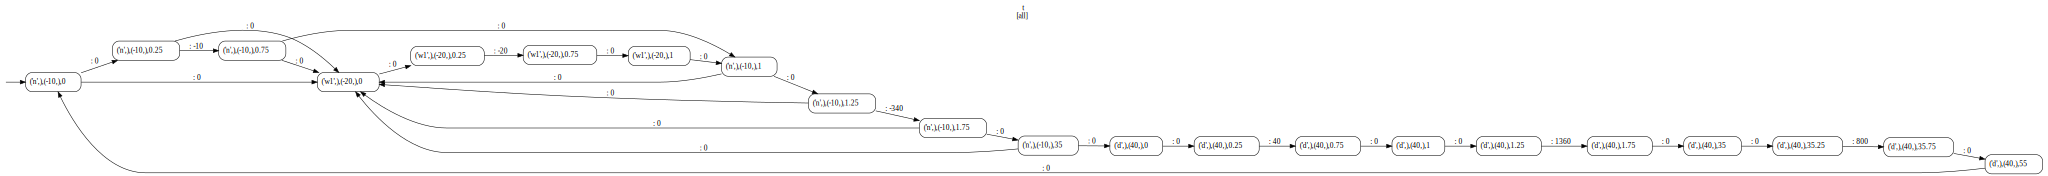

./tchecker/build/src/tck-reach -a reach -C tchecker_examples/satellite_work_1.tchk.zg -l Init tchecker_examples/satellite_work_1.tchk
REACHABLE false
RUNNING_TIME_SECONDS 0.00048711
VISITED_STATES 6
Zone graph has 6 states
cpa abstraction has 25 states


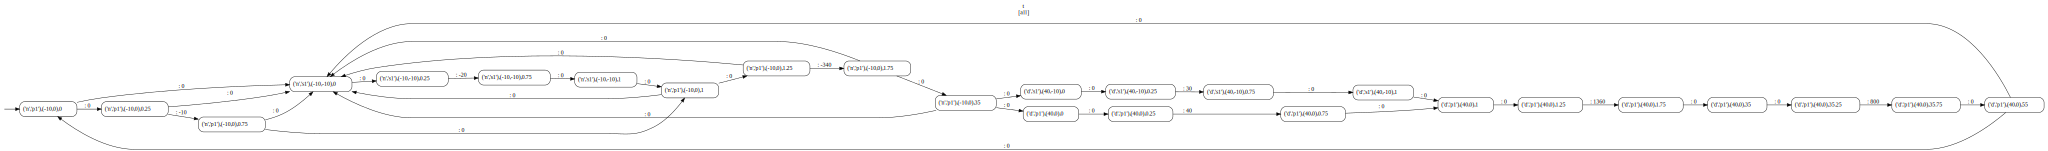

In [4]:
# Comparing the versions
# Before launching the benchmarks, we compare two different modelling approaches
# Number of work modules
i = 1
bddDict = spot.make_bdd_dict()
tchkFileBase = f"tchecker_examples/satellite_work_base_{i}.tchk"
tchkFileSync = f"tchecker_examples/satellite_work_{i}.tchk"
tchkFiles = [tchkFileBase, tchkFileSync]
wbas = []
for tchkFile in tchkFiles:
    wba = to_weighted_twa.translate(tchkFile, bddDict)
    print(f"Zone graph has {n_states(tchkFile+'.zg')} states")

    wbas.append(wba)
    print(f"cpa abstraction has {wba.num_states()} states")
    display(wba.show("tbrg"))

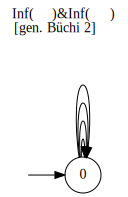

In [5]:
spec = spot.translate("GF(dT) && GF(tr1)", dict = bddDict)
display(spec.show("tbrg"))

WBA with spec has 21 states


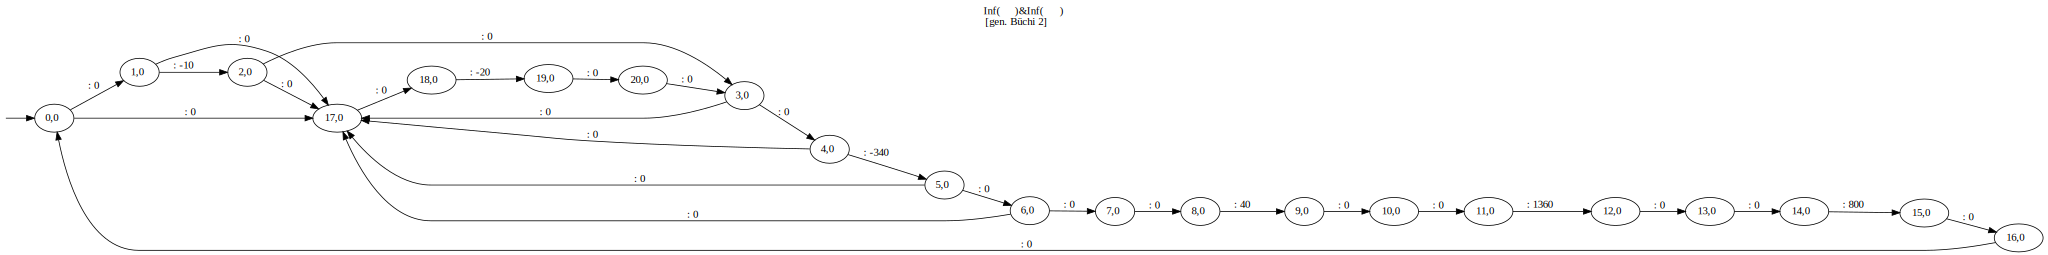

Original automaton


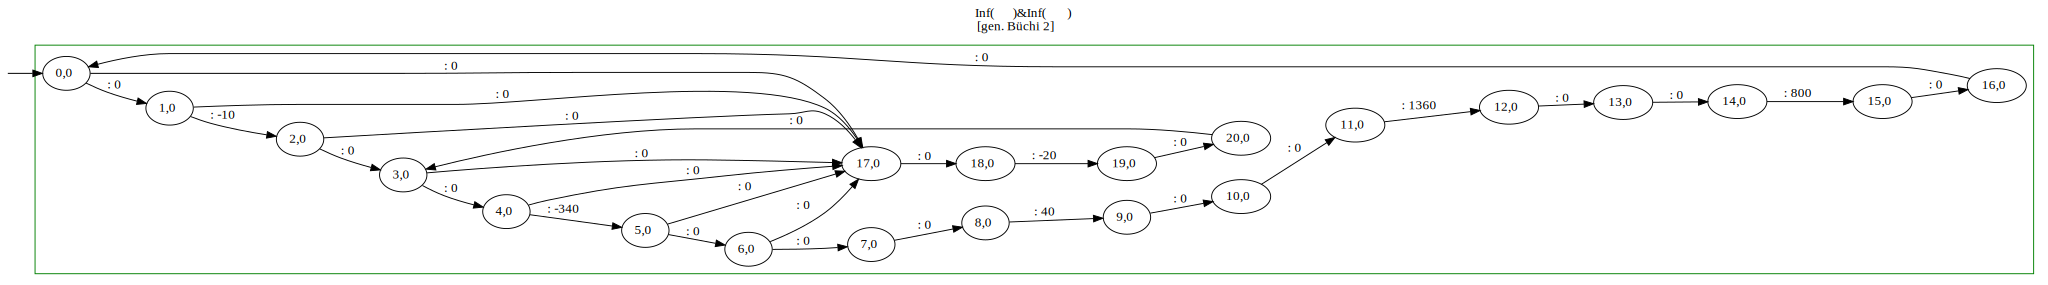

Prefix energy per state
array('q', [650, 350, 350, 340, 350, 340, 330, 340, 330, 0, 0, 0, 0, 40, 40, 40, 350, 350, 350, 350, 350])
Current optimal predescessor
array('Q', [0, 1, 2, 3, 5, 6, 8, 9, 11, 12, 15, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27])
State names are: "state number, max energy"
Optimal predescessor is highlighted in pink


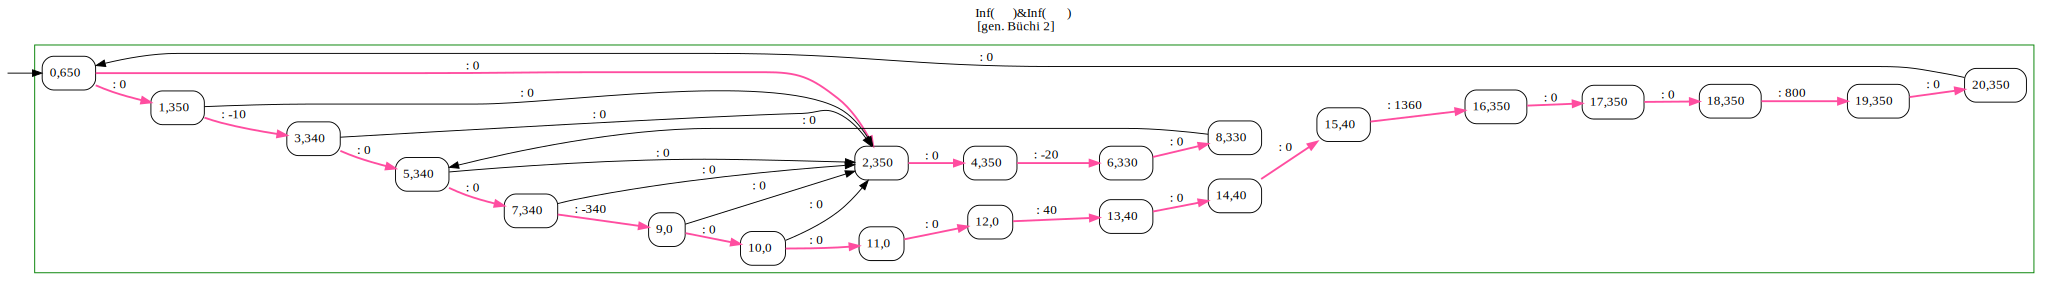

Checking SCC 0
Degeneralized SCC has: 42 states, 56 edges and 1 back-edges.
Current SCC with: 42 states and 1 back-edges
{0: 0, 1: 1, 3: 2, 5: 3, 7: 4, 9: 5, 10: 6, 11: 7, 12: 8, 13: 9, 14: 10, 15: 11, 16: 12, 17: 13, 18: 14, 19: 15, 20: 16, 2: 17, 4: 18, 6: 19, 8: 20}


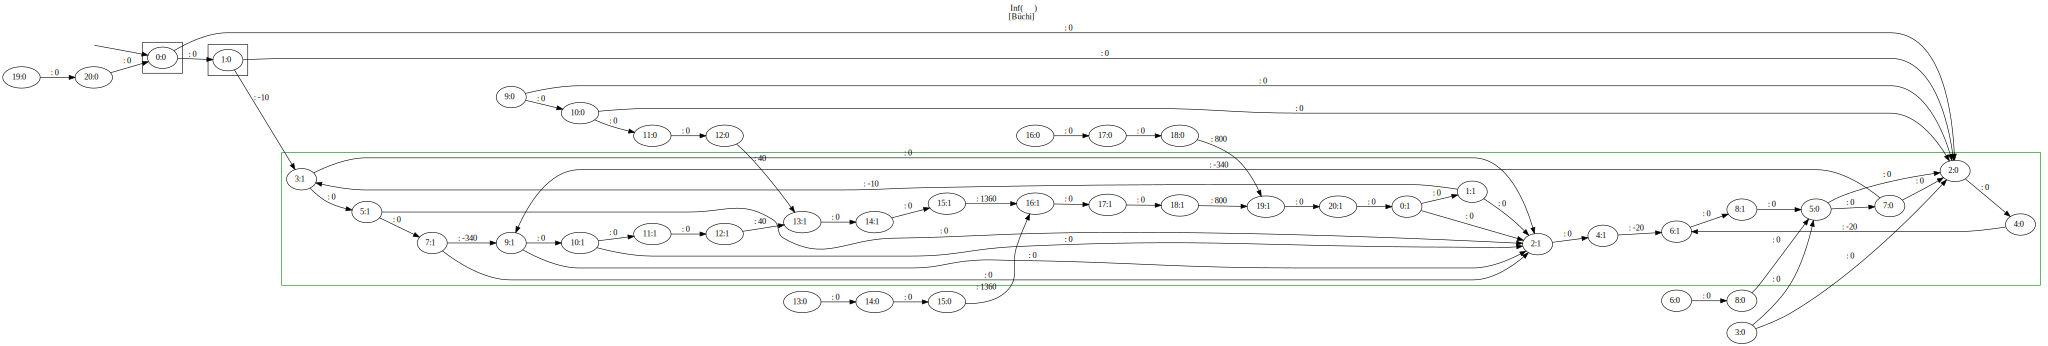

Analysing backedge 8:1 -> 5:0.
We start with 340 energy in state 5:0.
array('q', [-1, -1, -1, 340, 340, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 340, 340, -1, -1, 350, 350, 340, 340, 340, 0, 0, 0, 0, 40, 40, 40, 350, 350, 350, 350, 350, 350, 350, 330, 330]) array('Q', [0, 0, 0, 0, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 49, 0, 0, 48, 2, 6, 10, 14, 17, 22, 26, 30, 32, 34, 36, 38, 40, 42, 44, 46, 4, 50, 52, 54])
We restart with 330 energy in state 5:0.
array('q', [-1, -1, -1, 330, 330, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 330, 330, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 310, 310]) array('Q', [0, 0, 0, 0, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 49, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 54])
No feasible Büchi run detected!
WBA with spec has 25 states


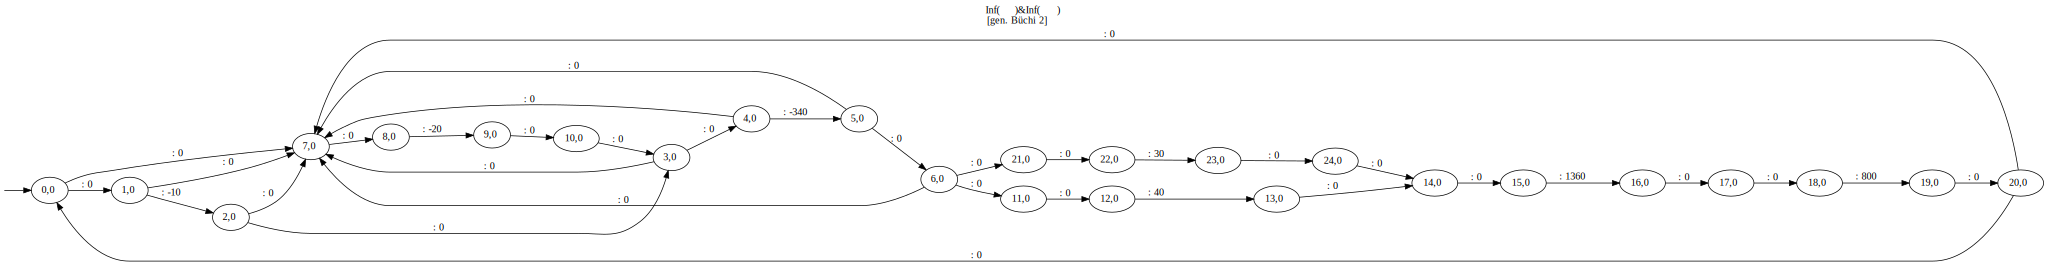

Original automaton


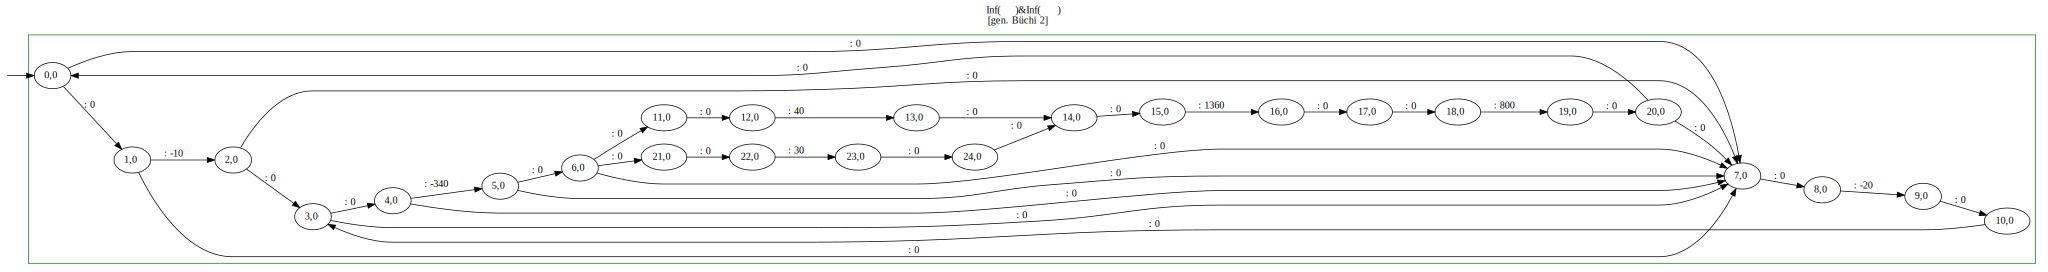

Prefix energy per state
array('q', [650, 350, 350, 340, 350, 340, 330, 340, 330, 0, 0, 0, 0, 0, 0, 40, 30, 40, 30, 40, 350, 350, 350, 350, 350])
Current optimal predescessor
array('Q', [0, 1, 2, 3, 5, 6, 8, 9, 11, 12, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32])
State names are: "state number, max energy"
Optimal predescessor is highlighted in pink


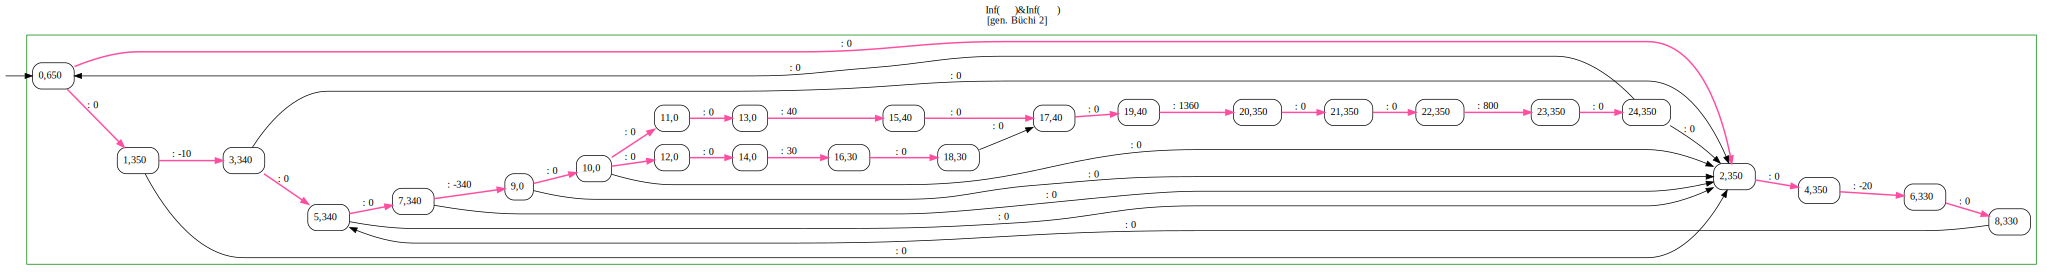

Checking SCC 0
Degeneralized SCC has: 50 states, 68 edges and 2 back-edges.
Current SCC with: 50 states and 2 back-edges
{0: 0, 1: 1, 3: 2, 5: 3, 7: 4, 9: 5, 10: 6, 2: 7, 4: 8, 6: 9, 8: 10, 11: 11, 13: 12, 15: 13, 17: 14, 19: 15, 20: 16, 21: 17, 22: 18, 23: 19, 24: 20, 12: 21, 14: 22, 16: 23, 18: 24}


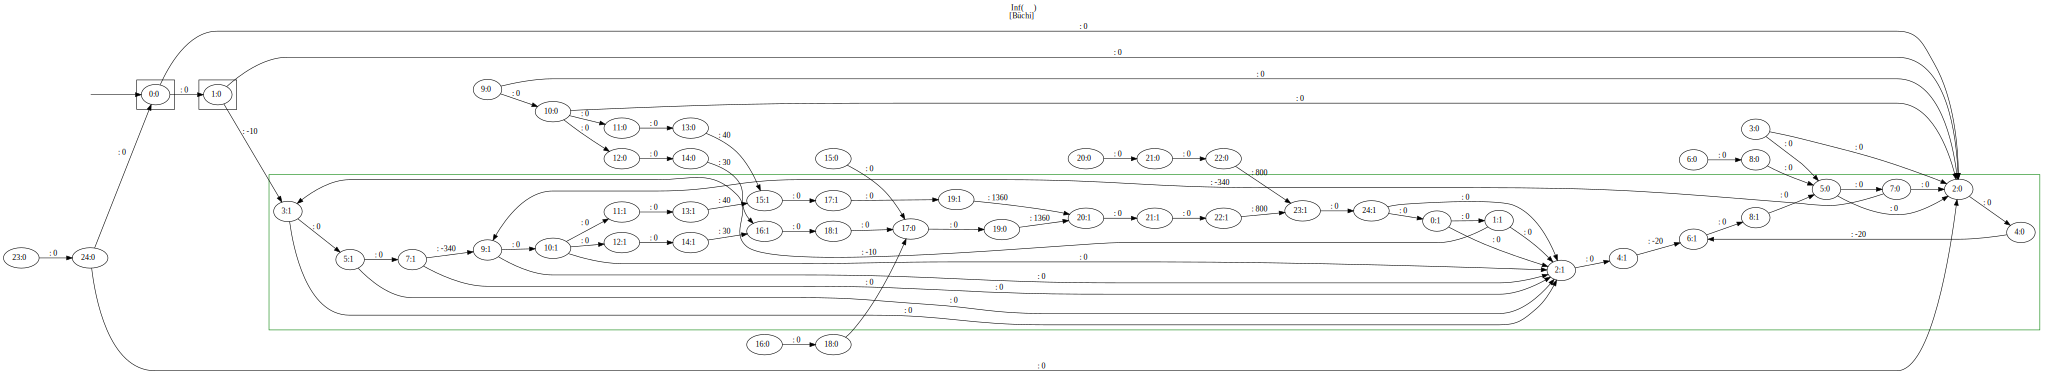

Analysing backedge 8:1 -> 5:0.
We start with 340 energy in state 5:0.
array('q', [-1, -1, -1, 340, 340, -1, -1, 340, 340, -1, -1, -1, -1, -1, 30, 30, -1, -1, -1, -1, -1, -1, -1, -1, -1, 350, 350, 340, 340, 340, 0, 0, 350, 350, 330, 330, 0, 0, 40, 40, 40, 350, 350, 350, 350, 350, 0, 0, 30, 30]) array('Q', [0, 0, 0, 0, 13, 0, 0, 15, 31, 0, 0, 0, 0, 0, 68, 45, 0, 0, 0, 0, 0, 0, 0, 0, 0, 58, 2, 6, 10, 14, 17, 22, 60, 32, 34, 36, 28, 40, 42, 44, 46, 48, 50, 52, 54, 56, 30, 62, 64, 66])
We restart with 330 energy in state 5:0.
array('q', [-1, -1, -1, 330, 330, -1, -1, 330, 330, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 310, 310, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]) array('Q', [0, 0, 0, 0, 13, 0, 0, 15, 31, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 33, 36, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
Analysing backedge 18:1 -> 17:0.
We start with 40 energy in state 17:0.
array('q', [-1

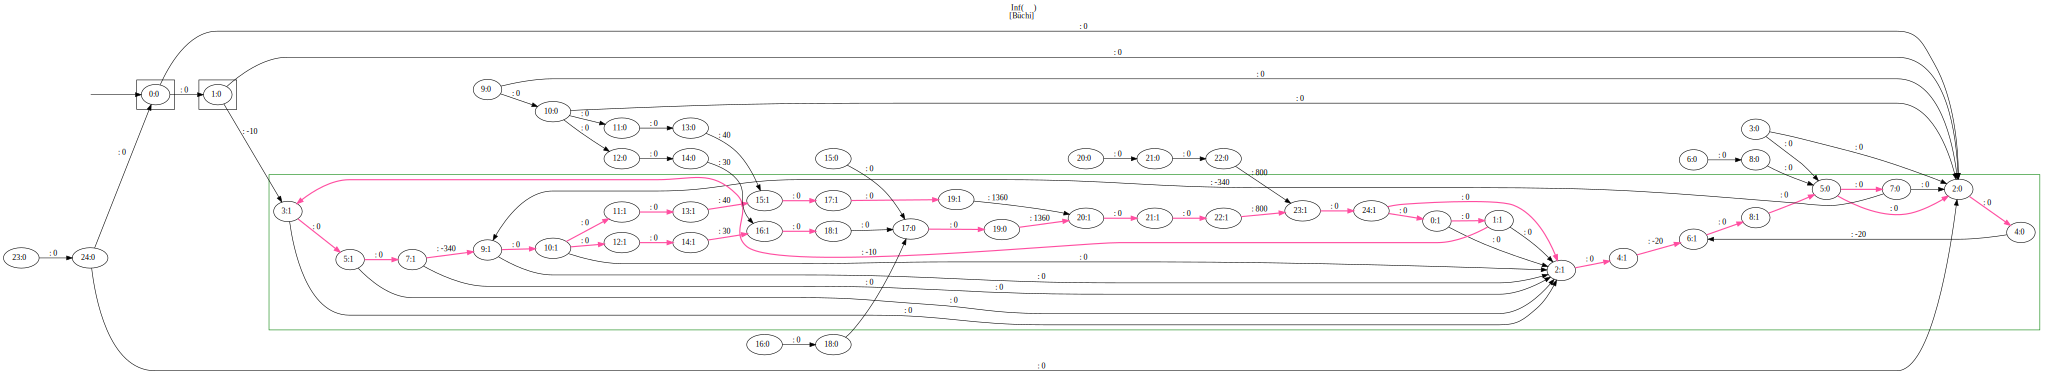

In [6]:
tot_wbas = []
for wba in wbas:
    tot_wba = spot.product(wba, spec)
    tot_wbas.append(tot_wba)
    print(f"WBA with spec has {tot_wba.num_states()} states")
    display(tot_wba.show("tbrg"))
    # Solve
    WBA_utils.BuechiEnergy(tot_wba, tot_wba.get_init_state_number(), initial, wup, 2) 

./tchecker/build/src/tck-reach -a reach -C tchecker_examples/satellite_work_base_1_unfeas.tchk.zg -l Init tchecker_examples/satellite_work_base_1_unfeas.tchk
REACHABLE false
RUNNING_TIME_SECONDS 0.000122048
VISITED_STATES 4
Zone graph has 4 states
cpa abstraction has 21 states


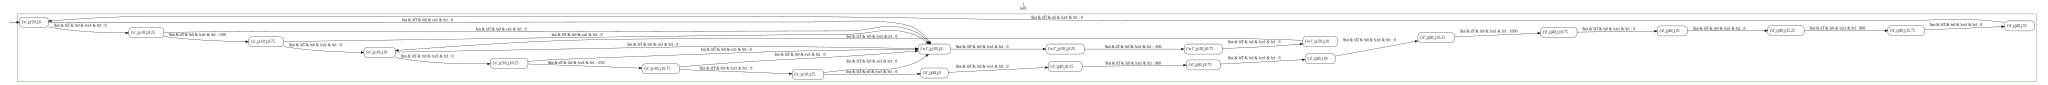

./tchecker/build/src/tck-reach -a reach -C tchecker_examples/satellite_work_1_unfeas.tchk.zg -l Init tchecker_examples/satellite_work_1_unfeas.tchk
REACHABLE false
RUNNING_TIME_SECONDS 0.000416548
VISITED_STATES 5
Zone graph has 5 states
cpa abstraction has 22 states


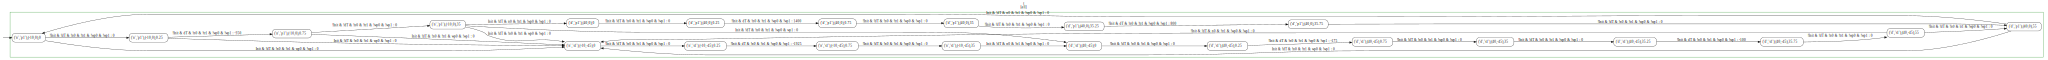

In [7]:
# Testing infeasible wta
tchkFileBase = f"tchecker_examples/satellite_work_base_1_unfeas.tchk"
tchkFileSync = f"tchecker_examples/satellite_work_1_unfeas.tchk"
tchkFiles = [tchkFileBase, tchkFileSync]
wbas = []
for tchkFile in tchkFiles:
    wba = to_weighted_twa.translate(tchkFile, bddDict)
    print(f"Zone graph has {n_states(tchkFile+'.zg')} states")

    wbas.append(wba)
    print(f"cpa abstraction has {wba.num_states()} states")
    display(wba.show("brs"))

WBA with spec has 21 states


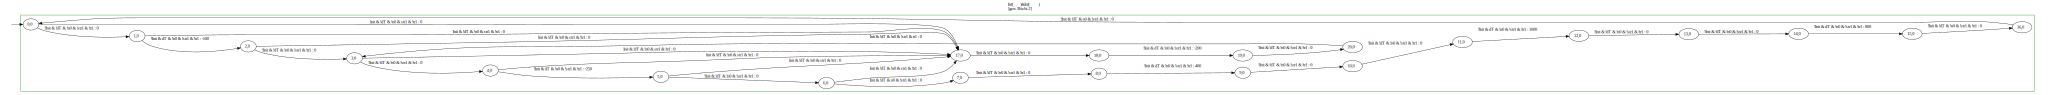

Original automaton


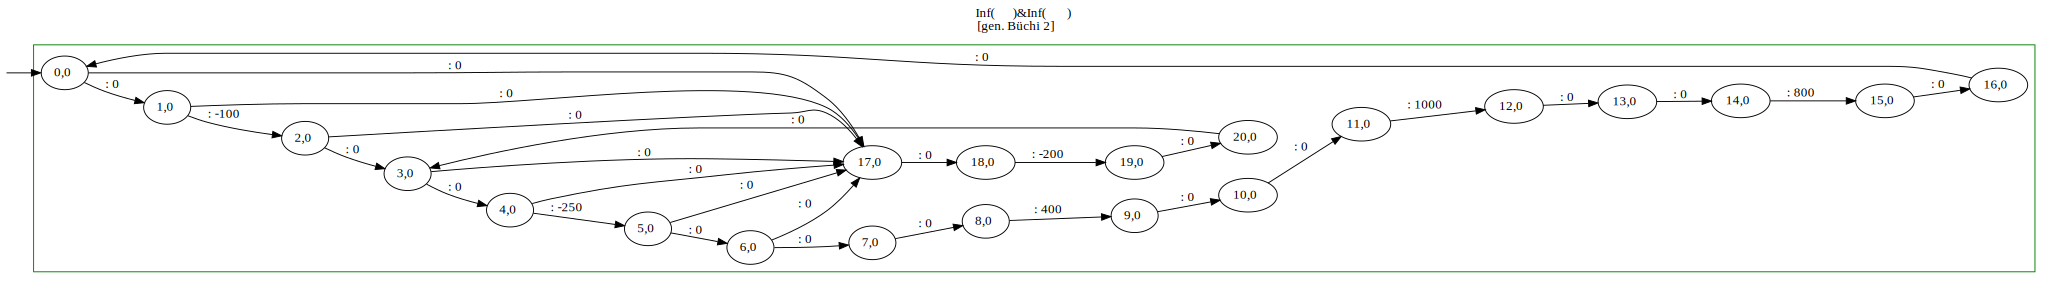

Prefix energy per state
array('q', [650, 350, 350, 250, 350, 250, 150, 250, 150, 0, 0, 0, 0, 350, 350, 350, 350, 350, 350, 350, 350])
Current optimal predescessor
array('Q', [0, 1, 2, 3, 5, 6, 8, 9, 11, 12, 15, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27])
State names are: "state number, max energy"
Optimal predescessor is highlighted in pink


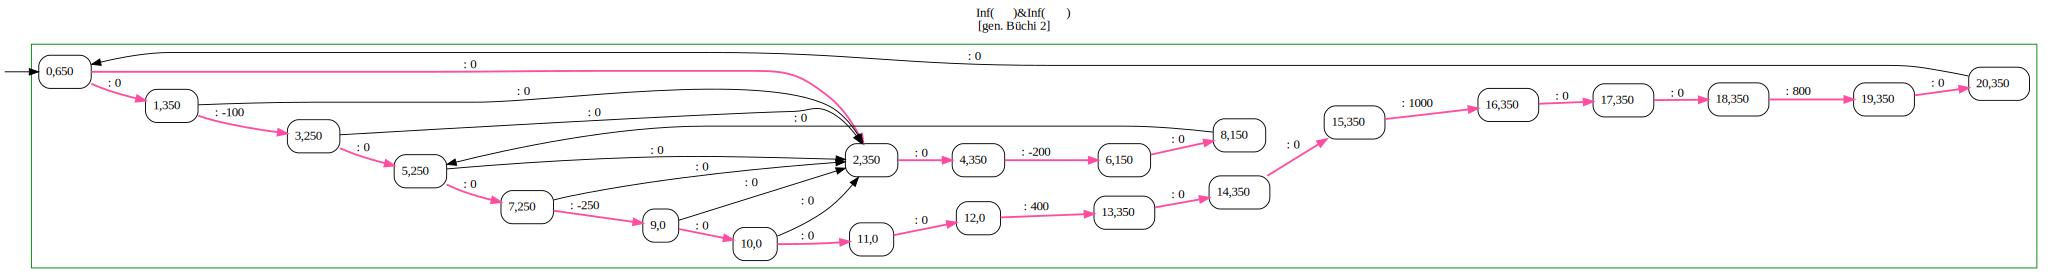

Checking SCC 0
Degeneralized SCC has: 42 states, 56 edges and 1 back-edges.
Current SCC with: 42 states and 1 back-edges
{0: 0, 1: 1, 3: 2, 5: 3, 7: 4, 9: 5, 10: 6, 11: 7, 12: 8, 13: 9, 14: 10, 15: 11, 16: 12, 17: 13, 18: 14, 19: 15, 20: 16, 2: 17, 4: 18, 6: 19, 8: 20}


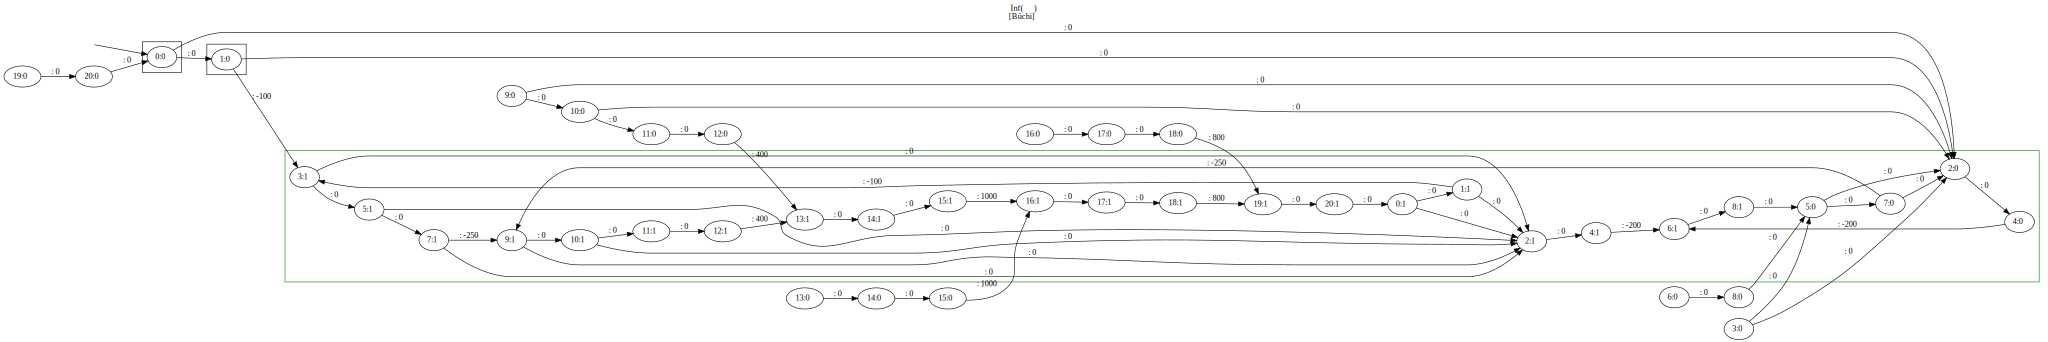

Analysing backedge 8:1 -> 5:0.
We start with 250 energy in state 5:0.
array('q', [-1, -1, -1, 250, 250, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 250, 250, -1, -1, 350, 350, 250, 250, 250, 0, 0, 0, 0, 350, 350, 350, 350, 350, 350, 350, 350, 350, 350, 150, 150]) array('Q', [0, 0, 0, 0, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 49, 0, 0, 48, 2, 6, 10, 14, 17, 22, 26, 30, 32, 34, 36, 38, 40, 42, 44, 46, 4, 50, 52, 54])
We restart with 150 energy in state 5:0.
array('q', [-1, -1, -1, 150, 150, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 150, 150, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]) array('Q', [0, 0, 0, 0, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 49, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
No feasible Büchi run detected!
WBA with spec has 22 states


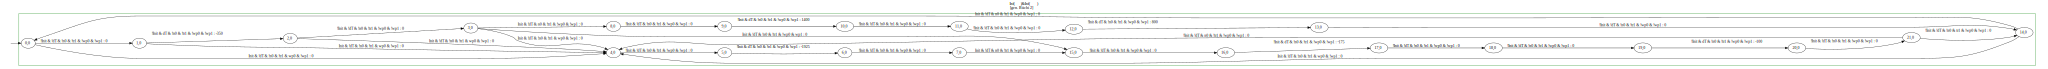

Original automaton


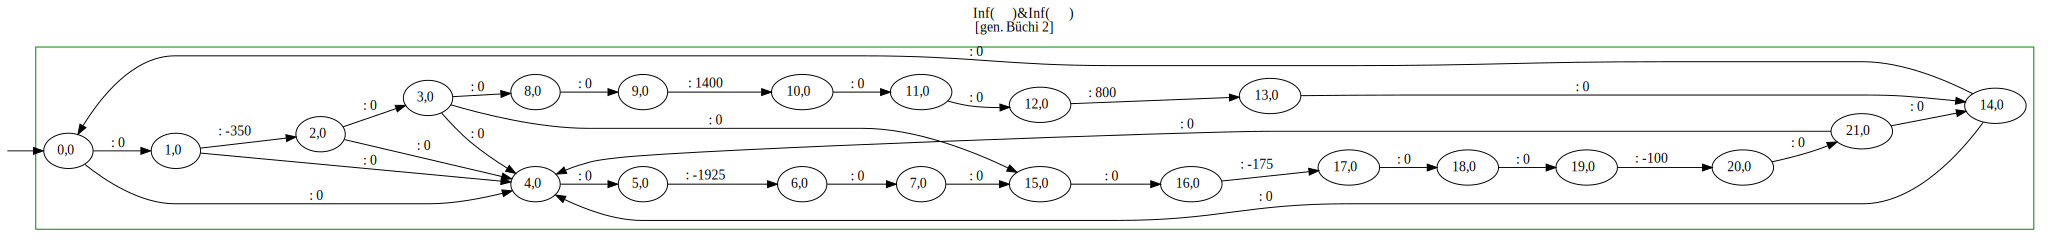

Prefix energy per state
array('q', [650, 350, 350, 0, 350, 0, -1, 0, 0, -1, 0, 0, 350, -1, 350, -1, 350, -1, 350, -1, 350, -1])
Current optimal predescessor
array('Q', [0, 1, 2, 3, 5, 6, 0, 10, 11, 0, 13, 14, 16, 0, 18, 0, 20, 0, 22, 0, 24, 0])
State names are: "state number, max energy"
Optimal predescessor is highlighted in pink


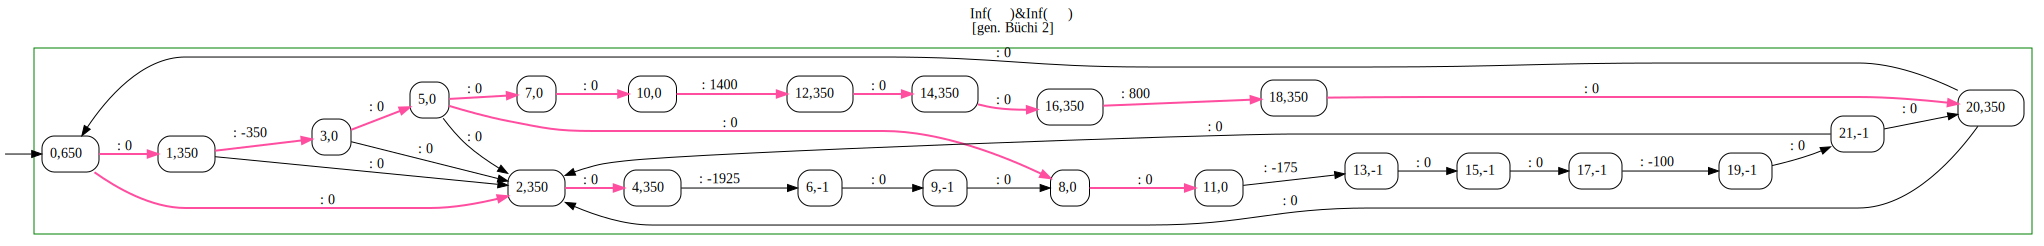

Checking SCC 0
Degeneralized SCC has: 44 states, 58 edges and 1 back-edges.
Current SCC with: 44 states and 1 back-edges
{0: 0, 1: 1, 3: 2, 5: 3, 2: 4, 4: 5, 6: 6, 9: 7, 8: 8, 11: 9, 13: 10, 15: 11, 17: 12, 19: 13, 21: 14, 20: 15, 7: 16, 10: 17, 12: 18, 14: 19, 16: 20, 18: 21}


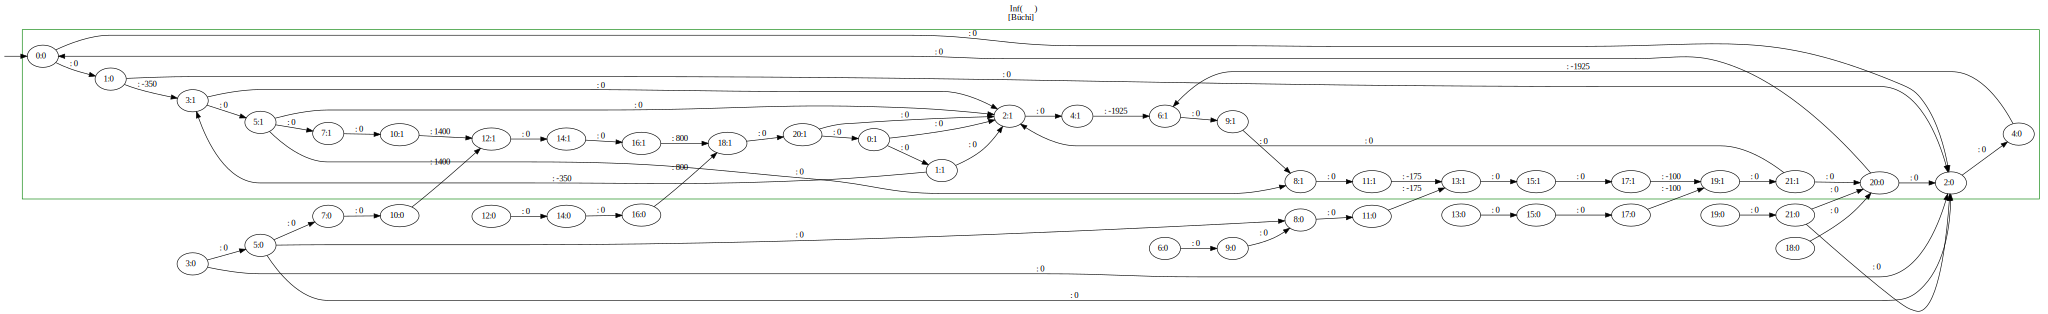

Analysing backedge 21:1 -> 20:0.
We start with 350 energy in state 20:0.
array('q', [350, 350, -1, -1, 350, 350, -1, -1, -1, -1, -1, -1, -1, -1, -1, 350, -1, -1, -1, -1, -1, -1, 350, 350, 0, 0, 350, 350, -1, -1, 0, 0, -1, -1, -1, -1, -1, 350, 0, 0, 350, 350, 350, 350]) array('Q', [43, 1, 0, 0, 45, 19, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 44, 2, 5, 10, 46, 20, 0, 0, 18, 28, 0, 0, 0, 0, 0, 58, 16, 48, 50, 52, 54, 56])
No feasible Büchi run detected!


In [8]:
tot_wbas = []
for wba in wbas:
    tot_wba = spot.product(wba, spec)
    tot_wbas.append(tot_wba)
    print(f"WBA with spec has {tot_wba.num_states()} states")
    display(tot_wba.show("brs"))
    # Solve
    WBA_utils.BuechiEnergy(tot_wba, tot_wba.get_init_state_number(), initial, wup, 2) 

In [9]:
#Benchmarks
#Run
if not loadOnly:
    subprocess.call(f"python3 run_bench.py --Nmax {Nmax} --Nstep {Nstep} "
                    + f"--initial {initial} --wup {wup} --Nrep {Nrep} --file {benchfile}", 
                    shell=True)

Creating example upto 11 with step 1
REACHABLE false
RUNNING_TIME_SECONDS 0.000277045
VISITED_STATES 4
/media/philipp/cc069263-05da-48d7-bc4c-5fa6918260465/tmp/sub_fm/sub_fm/xxx/ebuechi_artefact/ebuechi_artefact/code/spot/python/spot/__init__.py
./tchecker/build/src/tck-reach -a reach -C tchecker_examples/satellite_work_base_1.tchk.zg -l Init tchecker_examples/satellite_work_base_1.tchk
Done
REACHABLE false
RUNNING_TIME_SECONDS 0.000349249
VISITED_STATES 4
/media/philipp/cc069263-05da-48d7-bc4c-5fa6918260465/tmp/sub_fm/sub_fm/xxx/ebuechi_artefact/ebuechi_artefact/code/spot/python/spot/__init__.py
./tchecker/build/src/tck-reach -a reach -C tchecker_examples/satellite_work_base_1.tchk.zg -l Init tchecker_examples/satellite_work_base_1.tchk
Done
REACHABLE false
RUNNING_TIME_SECONDS 0.000116356
VISITED_STATES 4
/media/philipp/cc069263-05da-48d7-bc4c-5fa6918260465/tmp/sub_fm/sub_fm/xxx/ebuechi_artefact/ebuechi_artefact/code/spot/python/spot/__init__.py
./tchecker/build/src/tck-reach -a reac

/media/philipp/cc069263-05da-48d7-bc4c-5fa6918260465/tmp/sub_fm/sub_fm/xxx/ebuechi_artefact/ebuechi_artefact/code/spot/python/spot/__init__.py
./tchecker/build/src/tck-reach -a reach -C tchecker_examples/satellite_work_base_5.tchk.zg -l Init tchecker_examples/satellite_work_base_5.tchk
Done
REACHABLE false
RUNNING_TIME_SECONDS 0.00124763
VISITED_STATES 12
/media/philipp/cc069263-05da-48d7-bc4c-5fa6918260465/tmp/sub_fm/sub_fm/xxx/ebuechi_artefact/ebuechi_artefact/code/spot/python/spot/__init__.py
./tchecker/build/src/tck-reach -a reach -C tchecker_examples/satellite_work_base_5.tchk.zg -l Init tchecker_examples/satellite_work_base_5.tchk
Done
REACHABLE false
RUNNING_TIME_SECONDS 0.00121958
VISITED_STATES 12
/media/philipp/cc069263-05da-48d7-bc4c-5fa6918260465/tmp/sub_fm/sub_fm/xxx/ebuechi_artefact/ebuechi_artefact/code/spot/python/spot/__init__.py
./tchecker/build/src/tck-reach -a reach -C tchecker_examples/satellite_work_base_5.tchk.zg -l Init tchecker_examples/satellite_work_base_5.tc

Traceback (most recent call last):
  File "one_exec.py", line 41, in <module>
    wba = to_weighted_twa.translate(tchkFile)
  File "/media/philipp/cc069263-05da-48d7-bc4c-5fa6918260465/tmp/sub_fm/sub_fm/xxx/ebuechi_artefact/ebuechi_artefact/code/to_weighted_twa.py", line 30, in translate
    subprocess.check_call(["./tchecker/build/src/tck-reach", "-a", "reach",  "-C",  zgFile, "-l",  "Init", tcheckerFile])
  File "/usr/lib/python3.8/subprocess.py", line 359, in check_call
    retcode = call(*popenargs, **kwargs)
  File "/usr/lib/python3.8/subprocess.py", line 342, in call
    return p.wait(timeout=timeout)
  File "/usr/lib/python3.8/subprocess.py", line 1083, in wait
    return self._wait(timeout=timeout)
  File "/usr/lib/python3.8/subprocess.py", line 1806, in _wait
    (pid, sts) = self._try_wait(0)
  File "/usr/lib/python3.8/subprocess.py", line 1764, in _try_wait
    (pid, sts) = os.waitpid(self.pid, wait_flags)
KeyboardInterrupt
Traceback (most recent call last):
  File "run_benc

KeyboardInterrupt: 

In [ ]:
#Results
rescsv = pandas.read_csv("bench.csv")
rescsv

In [ ]:
# Get the average
resmean = rescsv.groupby('file', as_index=False).mean()
resmean

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
is_base = ["base" in x for x in resmean["file"]]
res_base = resmean.loc[is_base]
res_base_sort = res_base.groupby('numModules', as_index=False).mean()

is_sync = [not x for x in is_base]
res_sync = resmean.loc[is_sync]
res_sync_sort = res_sync.groupby('numModules', as_index=False).mean()

f,a = plt.subplots(2,1)
a[0].set_ylabel("solvetime [s]")
a[1].set_ylabel("# cpa States")
a[1].set_xlabel("# Modules")
a[0].set_yscale("log")
a[1].set_yscale("log")
a[0].grid("on")
a[1].grid("on")
a[0].plot(res_base_sort["numModules"], res_base_sort["cpaStates"], ".-b")
a[1].plot(res_base_sort["numModules"], res_base_sort["solvetime"], ".-b")
a[0].plot(res_sync_sort["numModules"], res_sync_sort["cpaStates"], ".-r")
a[1].plot(res_sync_sort["numModules"], res_sync_sort["solvetime"], ".-r")


In [ ]:
# Create table
print(resmean.keys())
texFile = benchfile.split(".")[0]+".tex"
with open(texFile, "w") as f:
    f.write("\\begin{tabular}{ c | r | r | r |}\n")
    f.write("\\# mod & \\# states & to cpa [s] & sol [s] \\\\\\hline\n")
    
    for N in Nall:
        resN = resmean.loc[resmean['file'] == f"tchecker_examples/satellite_work_{N}.tchk"]
        assert(len(resN.keys() == 1))
        f.write(f"""{N} & {int(list(resN["cpaStates"])[0]):d} & {list(resN["tchk2cpatime"])[0]:.2f} & {list(resN["solvetime"])[0]:.2f} \\\\\\hline\n""")
    f.write("\\end{tabular}\n")

In [ ]:
with open(texFile, "r") as f:
    print("".join(f.readlines()))

In [ ]:
# Create an extended table
print(resmean.keys())
texFile = benchfile.split(".")[0]+"_ext.tex"
with open(texFile, "w") as f:
    f.write("\\begin{tabular}{ c | r | r | r | r |}\n")
    f.write("\\# mod & \\# states (WTBA) & \\# states (cpa) & to cpa [s] & sol [s] \\\\\\hline\n")

    for N in Nall:
        resN = resmean.loc[resmean['file'] == f"tchecker_examples/satellite_work_{N}.tchk"]
        assert(len(resN.keys() == 1))
        f.write(f"""{N} & {2**(N+1)} & {int(list(resN["cpaStates"])[0]):d} & {list(resN["tchk2cpatime"])[0]:.2f} & {list(resN["solvetime"])[0]:.2f} \\\\\\hline\n""")
    f.write("\\end{tabular}\n")

In [ ]:
with open(texFile, "r") as f:
    print("".join(f.readlines()))